In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [3]:
df = pd.read_csv(url, sep=';')

In [4]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [5]:
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')

df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce') 

df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce') 

df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce') 


In [6]:
df['HarPassasjerer'] = df.Passasjerer_Ombord > 0
df['AntallPlasserTilgjengelig'] = df.Kjøretøy_Kapasitet - df.Passasjerer_Ombord
df['SekunderVedPåstigning'] = df.Tidspunkt_Faktisk_Avgang_Holdeplass_Fra - df.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra
df['ForsinkelseAnkomst'] = df.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra - df.Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra
df['ForsinkelseAvgang'] = df.Tidspunkt_Faktisk_Avgang_Holdeplass_Fra - df.Tidspunkt_Planlagt_Avgang_Holdeplass_Fra

<AxesSubplot:>

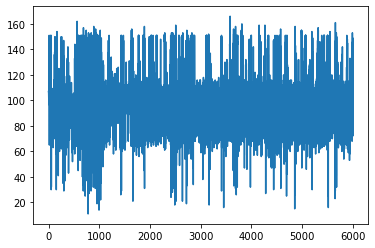

In [13]:
df['AntallPlasserTilgjengelig'].plot.line()

<AxesSubplot:>

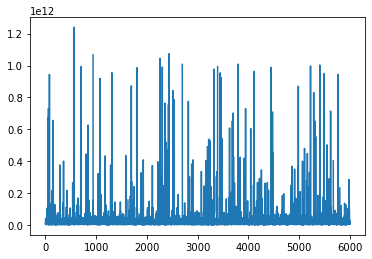

In [14]:
df['SekunderVedPåstigning'].plot.line()

<AxesSubplot:>

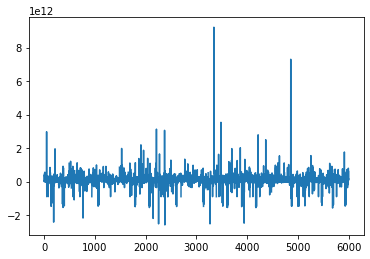

In [15]:
df['ForsinkelseAnkomst'].plot.line()

<AxesSubplot:>

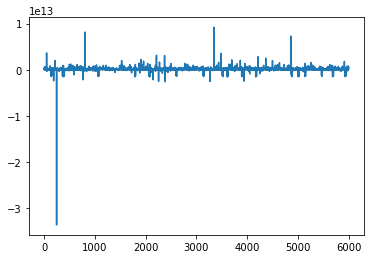

In [16]:
df['ForsinkelseAvgang'].plot.line()